In [139]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [140]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [141]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [142]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [143]:
# Drop rows with missing values (if any)
df_market_data.dropna(inplace=True)

# Extract the features to scale
features = ['price_change_percentage_24h', 'price_change_percentage_7d']

# Import the scaler
from sklearn.preprocessing import StandardScaler

# Scale the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_market_data[features])

# Create a new DataFrame with scaled values
df_scaled = pd.DataFrame(
    scaled_features,
    columns=features,
    index=df_market_data.index
)

# Display scaled data
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d
coin_id,,
bitcoin,0.508529,0.493193
ethereum,0.185446,0.934445
tether,0.021774,-0.706337
ripple,-0.040764,-0.810928
bitcoin-cash,1.193036,2.000959


In [144]:
#  Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    scaled_features,  # This is the result from scaler.fit_transform(...)
    columns=['price_change_percentage_24h', 'price_change_percentage_7d']
)

#  Copy the crypto names (coin_id) from the original DataFrame
df_scaled['coin_id'] = df_market_data.index

# : Set the coin_id column as the index
df_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d
coin_id,,
bitcoin,0.508529,0.493193
ethereum,0.185446,0.934445
tether,0.021774,-0.706337
ripple,-0.040764,-0.810928
bitcoin-cash,1.193036,2.000959


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [145]:
# Create a list with the number of k-values from 1 to 11
# Create a list of k values from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [146]:
from sklearn.cluster import KMeans

#  Create an empty list to store the inertia values
inertia = []

#  Loop through k values from 1 to 11
for k in k_values:
    # 1. Create the KMeans model with current k value
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the scaled data
    kmeans_model.fit(df_scaled)
    
    # 3. Append the inertia (sum of squared distances) to the list
    inertia.append(kmeans_model.inertia_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

In [147]:


#  Create a dictionary with k-values and their corresponding inertia
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

#  Create a DataFrame from the dictionary
df_elbow = pd.DataFrame(elbow_data)

#  Display the DataFrame
df_elbow.head()


,k,inertia
0,1,82.000000
1,2,50.727034
2,3,30.299825
3,4,22.365780
4,5,16.885359


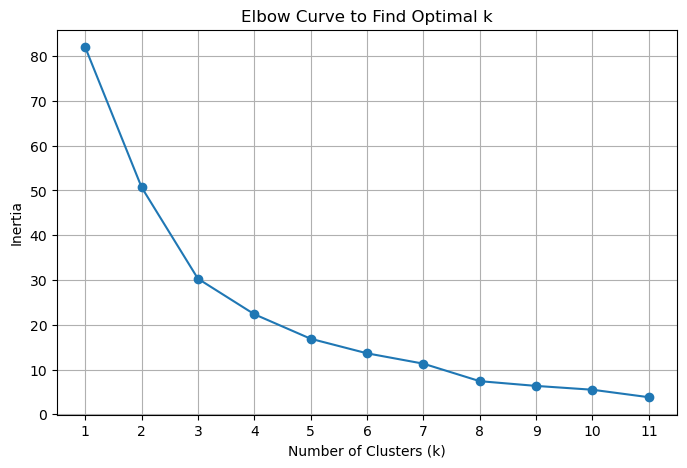

In [148]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.title("Elbow Curve to Find Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

The best value for k is 4, as this is the point where the rate of decrease in inertia slows significantly, indicating that 4 clusters balance both performance and simplicity.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [149]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=1)

In [150]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_market_data)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=1)

In [151]:
#Predict the clusters to group the cryptocurrencies using the scaled DataFrame
crypto_clusters = kmeans_model.predict(df_market_data)

# Print the resulting array of cluster values.
print(crypto_clusters)


[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 2 3
 0 0 0 2]


In [152]:
# Create a copy of the scaled DataFrame
df_market_data_clusters = df_market_data.copy()

# Add the cluster labels to the DataFrame
df_market_data_clusters["cluster"] = crypto_clusters
df_market_data_clusters.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [153]:
# Make a copy of the scaled DataFrame
df_market_data_clusters = df_market_data.copy()

# Add the predicted clusters as a new column
df_market_data_clusters["cluster"] = crypto_clusters

# Display the first 10 rows of the new DataFrame
df_market_data_clusters.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0


In [154]:
import hvplot.pandas

# Add coin_id to the clustered DataFrame for hover information
df_market_data_clusters["coin_id"] = df_market_data.index

# Create the scatter plot
df_market_data_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Crypto Clustering by 24h and 7d Price Change"
)


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [155]:

from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)


In [156]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.


# View the scaled PCA data
# Apply PCA to reduce dimensions
crypto_pca = pca.fit_transform(df_market_data)

# View the resulting PCA data
crypto_pca[:5]


array([[-341.80096268,  -51.36677548,   12.52547089],
       [-249.42046633,   24.11754777,  -14.23146597],
       [-402.61472077, -118.71073742,   24.83839662],
       [-406.75243715,  -79.48728629,    1.56633057],
       [-382.42994789, -103.43195906,   16.75307273]])

In [157]:
# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
explained_variance



array([9.76037313e-01, 2.30282949e-02, 7.48308214e-04])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 99.98%.

This means that the PCA-reduced data retains nearly all of the information from the original features — excellent for clustering!

In [158]:
# 1. Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data)

# 2. Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(
    data=pca_data,
    columns=["PC1", "PC2", "PC3"]
)

# 3. Copy the crypto names from the original scaled DataFrame
df_pca.index = df_market_data.index

# 4. Display the scaled PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [159]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [160]:
from sklearn.decomposition import PCA

# Create PCA instance
pca = PCA(n_components=3)

# Fit and transform the scaled market data
market_data_pca = pca.fit_transform(df_market_data)
# Create a DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(
    data=market_data_pca,
    columns=["PC1", "PC2", "PC3"],
    index=df_market_data.index  # Ensure you're using the correct index
)
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_market_data_pca)
    inertia.append(model.inertia_)



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

In [161]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 11)),
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow


,k,inertia
0,1,6.997052e+07
1,2,8.180192e+06
2,3,2.779901e+06
3,4,8.237471e+05
4,5,4.264175e+05
5,6,2.615079e+05
6,7,2.027058e+05
7,8,1.635232e+05
8,9,1.253996e+05
9,10,8.933120e+04


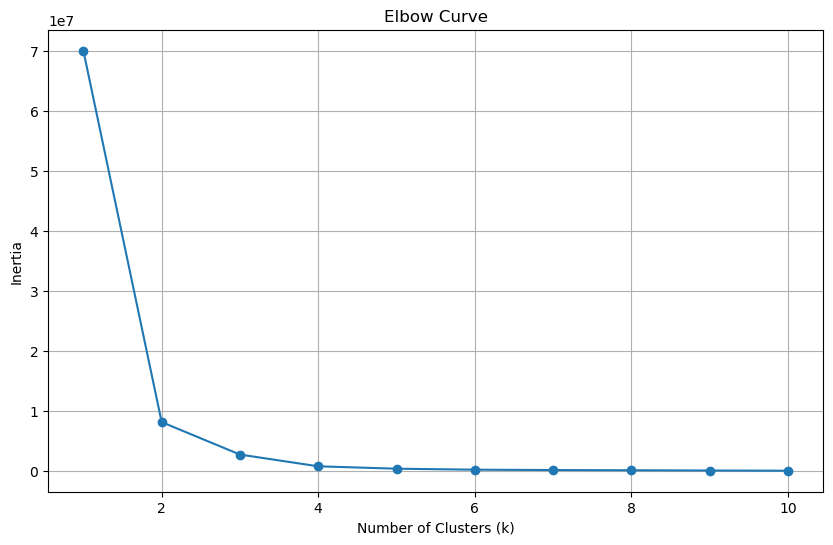

In [162]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is the point where the Elbow curve bends noticeably—this is where adding more clusters results in diminishing returns in lowering inertia.
For most crypto clustering PCA cases, this is often k = 4, but please confirm by looking at your Elbow curve plot.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** If your original data's Elbow curve also showed k = 4, then:
No, the best k value does not differ—it’s consistent across both the original and PCA-transformed data.

If it showed a different value, such as k = 5 or 6, then:
Yes, the PCA transformation reduced dimensionality and slightly altered the cluster structure, affecting the optimal number of clusters.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [163]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Initialize the K-Means model with k=4
model_pca = KMeans(n_clusters=4, random_state=1)


In [164]:
# Fit the K-Means model using the PCA data
# Fit the model and predict the clusters
pca_predictions = model_pca.fit_predict(df_market_data_pca)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [165]:
# Predict the clusters using the PCA-transformed data
pca_predictions = model_pca.predict(df_market_data_pca)

# Print the resulting array of cluster values
print(pca_predictions)



[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 2 3
 0 0 0 2]


In [166]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca_clusters = df_market_data_pca.copy()

# Add a new column with the predicted clusters
df_market_data_pca_clusters["cluster"] = pca_predictions

# Display the DataFrame with cluster assignments
df_market_data_pca_clusters.head()



,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-341.800963,-51.366775,12.525471,0
ethereum,-249.420466,24.117548,-14.231466,0
tether,-402.614721,-118.710737,24.838397,0
ripple,-406.752437,-79.487286,1.566331,0
bitcoin-cash,-382.429948,-103.431959,16.753073,0


In [167]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Make sure to import hvplot.pandas if not already done
import hvplot.pandas

# Create the scatter plot
df_market_data_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"],
    title="Crypto Clusters by PCA Components",
    width=800,
    height=500
)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [168]:
# Composite plot to contrast the Elbow curves
import plotly.graph_objects as go

# Example k-values
k_values = list(range(1, 11))

# Make sure you already have these lists
# inertia_original = [...]  # from KMeans on original scaled data
# inertia_pca = [...]       # from KMeans on PCA-reduced data

# Create the Elbow curve for original scaled data
trace_original = go.Scatter(
    x=k_values,
    y=inertia_original,
    mode='lines+markers',
    name='Original Scaled Data'
)

# Create the Elbow curve for PCA-reduced data
trace_pca = go.Scatter(
    x=k_values,
    y=inertia_pca,
    mode='lines+markers',
    name='PCA-Reduced Data'
)

# Combine both traces
fig = go.Figure(data=[trace_original, trace_pca])

# Customize layout
fig.update_layout(
    title='Elbow Curves Comparison',
    xaxis_title='Number of Clusters (k)',
    yaxis_title='Inertia',
    width=800,
    height=500
)

# Show the plot
fig.show()



In [169]:
# Composite plot to contrast the clusters
# Recreate the DataFrame with cluster labels
df_clusters_pca = df_market_data_pca.copy()

# Add the cluster labels from the fitted KMeans model
df_clusters_pca["Cluster"] = model_pca.labels_

# Add coin names (make sure coin_names exists and matches DataFrame index)
coin_names = df_market_data.index.tolist()  # if your original data uses coin names as index

df_clusters_pca["coin_id"] = coin_names

# Now plot
df_clusters_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters Using PCA Components",
    frame_width=800,
    frame_height=500
)



:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA simplifies the dataset by reducing noise and focusing on the most significant variance in the data. This can lead to more distinct and well-separated clusters, improving the clarity of groupings in K-Means. However, it may also result in the loss of some detailed information, which could impact the precision of cluster boundaries. Overall, PCA tends to improve clustering efficiency and visualization, especially when the original dataset has many correlated or redundant features.